In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import time
import glob, os
from PIL import Image
import SimpleITK as sitk

import cv2

# ISLES 2018

In [ ]:
path = "/home/usuario/Downloads/ISLES2018/TRAINING/"
pathpngctv2 = "/home/usuario/Downloads/ISLES2018/pngctv2/"
pathpngctv2ss = "/home/usuario/Downloads/ISLES2018/pngctv2ss/"
pathpngctv2_binmask = "/home/usuario/Downloads/ISLES2018/pngctv2_binmask/"

(8, 256, 256) -23 3071


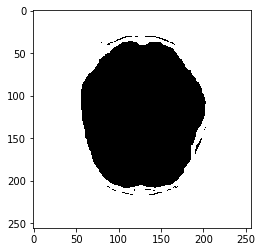

In [96]:
path = "/home/usuario/Downloads/ISLES2018/TRAINING/case_1/SMIR.Brain.XX.O.CT.345562/SMIR.Brain.XX.O.CT.345562.nii"
pathss = "/home/usuario/Downloads/ISLES2018/pngss/"

image = sitk.GetArrayFromImage(sitk.ReadImage(path))
print(image.shape, image.min(), image.max())
img_min = image.min()
img_max = image.max()

#print(image[4,150,:])
imageorig = np.copy(image)
image[image<0] = img_max
image[image>600] = img_max
#print(image[4,48,:])

for i in range(image.shape[1]):
    if image[4,i,128]!=img_max:
        for j in range(image.shape[1]):
            if image[4,i,j]!=img_max:
                #if (image[i,j]>-1 and image[i,j]<600) and (image[i,j:j+40] or xxx):
                if (np.mean(image[4,i,j:j+12])<90 or np.mean(image[4,i,j-12:j])<90):
                    #conservar
                    image[4,i,j] = img_min
                else:
                    image[4,i,j] = img_max
            
#print(image[4,48,:])

window = 1
level = 500
vmin = level - window/2
vmax = level + window/2
#plt.imshow(image[4,:,:], cmap='gray')
plt.imshow(image[4,:,:], cmap='gray', vmin=vmin, vmax=vmax)
plt.imsave("hola.png", image[4,:,:], cmap='gray', vmin=vmin, vmax=vmax)
#PIL_image = Image.fromarray(np.uint8(image)).convert('RGB')
#PIL_image.save(pathss+myfolder)

In [97]:
window = 80
level = 50
vmin = level - window/2
vmax = level + window/2
#plt.imshow(image[4,:,:], cmap='gray')
plt.imshow(imageorig[4,:,:], cmap='gray', vmin=vmin, vmax=vmax)
plt.imsave("original.png", imageorig[4,:,:], cmap='gray', vmin=vmin, vmax=vmax)
#PIL_image = Image.fromarray(np.uint8(image)).convert('RGB')
#PIL_image.save(pathss+myfolder)

(256, 256, 4)
(256, 256, 4)


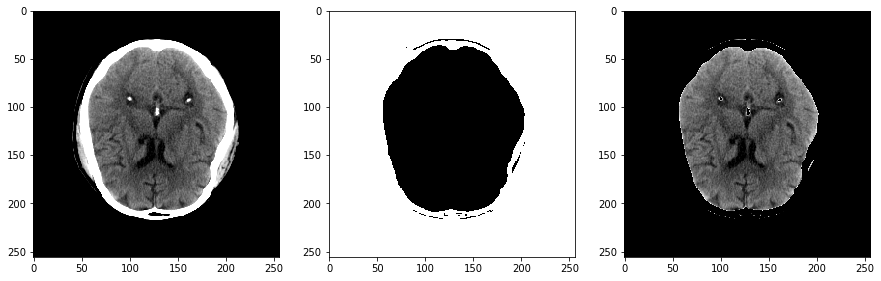

In [103]:
im1 = np.array(Image.open("original.png"))
im2 = np.array(Image.open("hola.png"))

print(im1.shape)
print(im2.shape)

#img = im1[:,:,0] - im2[:,:,0]
img = cv2.bitwise_and(im1[:,:,0], im1[:,:,0], mask=(255-im2[:,:,0]))
img[img>250] = 0

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.imshow(im1, cmap="gray")
plt.subplot(1,3,2)
plt.imshow(im2, cmap="gray")
plt.subplot(1,3,3)
plt.imshow(img, cmap="gray")
plt.imsave("res.png", img, cmap='gray')

#print(im1[128,:,0])
#print(im2[128,:,0])
#print(img[128])

<div style="height:100px;"></div>

# ISLES 2017

(24, 256, 256, 40) -6 1089


NameError: name 'otro' is not defined

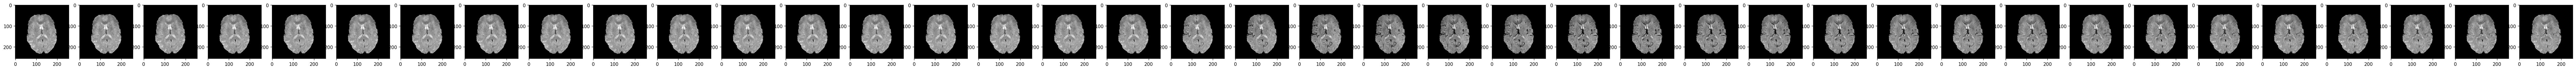

In [27]:
path = "/home/usuario/Downloads/ISLES2017/training/training_24/VSD.Brain.XX.O.MR_4DPWI.127135/VSD.Brain.XX.O.MR_4DPWI.127135.nii.gz"
#pathss = "/home/usuario/Downloads/ISLES2017/pngss/"

image = sitk.GetArrayFromImage(sitk.ReadImage(path))
print(image.shape, image.min(), image.max())
img_min = image.min()
img_max = image.max()

window = 640
level = 400
vmin = level - window/2
vmax = level + window/2

for s in range(image.shape[3]):
    plt.imshow(image[s,:,:,int(image.shape[3]/2)], cmap='gray', vmin=vmin, vmax=vmax)
    plt.imsave("hola.png", image[4,:,:], cmap='gray', vmin=vmin, vmax=vmax)

# Interactive widget

In [41]:
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

path = "/home/usuario/Downloads/ISLES2017/training/training_24/VSD.Brain.XX.O.MR_4DPWI.127135/VSD.Brain.XX.O.MR_4DPWI.127135.nii.gz"

image = sitk.GetArrayFromImage(sitk.ReadImage(path))
print(image.shape, image.min(), image.max())
img_min = image.min()
img_max = image.max()
window = 640
level = 400
vmin = level - window/2
vmax = level + window/2

def slow_function(i,j):
    plt.imshow(image[j,:,:,i], cmap='gray', vmin=vmin, vmax=vmax)

interact_manual(slow_function, i=widgets.IntSlider(min=0, max=image.shape[3]-1, step=1, value=image.shape[3]/2), j=widgets.IntSlider(min=0, max=image.shape[0]-1, step=1, value=0))

(24, 256, 256, 40) -6 1089


interactive(children=(IntSlider(value=20, description='i', max=39), IntSlider(value=0, description='j', max=23…

<function __main__.slow_function(i, j)>